# Regression Problem

In [58]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [59]:
import tensorflow as tf
from tensorflow import keras

In [60]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [61]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=24)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [62]:
# preprocessing data for ML model, to Standardize our data into mean, variance, 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [63]:
#generate same result every time we run the model
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
X_train.shape[1:]

(8,)

In [13]:
#build our network architecture with Sequential API, since our topology is simple
#without any activation, since it's an regression problem
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
]) 
#keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:])

2022-10-08 17:45:19.769723: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=['mae'])
#mae: mean absolute error. difference b/w the predictable value and the actual value
#mean_squ_err: it is the squar of the mae

In [16]:
# keras has weights and biases value in the memory. 
# So if we re-run this code again, this will not train the data from start
#but it will start from last epoch position
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8517 - mae: 0.9973 - val_loss: 0.7695 - val_mae: 0.6618
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7303 - mae: 0.6145 - val_loss: 0.6286 - val_mae: 0.5859
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6195 - mae: 0.5717 - val_loss: 0.5872 - val_mae: 0.5604
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5845 - mae: 0.5496 - val_loss: 0.5548 - val_mae: 0.5439
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5593 - mae: 0.5367 - val_loss: 0.5306 - val_mae: 0.5327
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5392 - mae: 0.5268 - val_loss: 0.5107 - val_mae: 0.5184
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5237 - mae: 0.5171 - val_loss: 0.4948 - val_mae: 0.5115
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [17]:
#evaluate performance
#after run the epoch serveral times, 
# if our loss is decreasing, then our hypothesis is correct and model is not converged
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4488 - mae: 0.4783


In [18]:
model_history.history

{'loss': [1.8517215251922607,
  0.7302682995796204,
  0.6195200085639954,
  0.5845125913619995,
  0.5592675805091858,
  0.5392464995384216,
  0.5236836671829224,
  0.5110926032066345,
  0.5012937188148499,
  0.49280279874801636,
  0.48590537905693054,
  0.48038506507873535,
  0.47517648339271545,
  0.47114434838294983,
  0.46694955229759216,
  0.46302297711372375,
  0.4607113301753998,
  0.45752307772636414,
  0.45469650626182556,
  0.45198193192481995],
 'mae': [0.9972531199455261,
  0.6144996881484985,
  0.5716909766197205,
  0.549618661403656,
  0.5366626381874084,
  0.5267825722694397,
  0.5171337723731995,
  0.5118051171302795,
  0.5052096843719482,
  0.5009879469871521,
  0.49781784415245056,
  0.4950461983680725,
  0.4918562173843384,
  0.4897323548793793,
  0.48791050910949707,
  0.48541373014450073,
  0.48508933186531067,
  0.4827003479003906,
  0.4812224209308624,
  0.4796876311302185],
 'val_loss': [0.7694946527481079,
  0.6285924911499023,
  0.5871626734733582,
  0.55479896

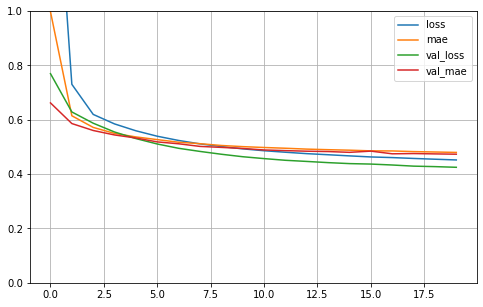

In [19]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

# if the plot is plat then we achieve convergence
plt.show()

In [20]:
#since we don't have new data, 
#so we choose randomly the first 3 data in test data to make a prediction
X_new = X_test[:3]

In [21]:
y_pred = model.predict(X_new)
print(y_pred)

[[3.0230258 ]
 [0.99659276]
 [3.2365978 ]]


In [19]:
print(y_test[:3])

[2.358 0.857 2.74 ]


# Functional API

In [ ]:
# its makes neural to learn the deep layers and patterns

In [22]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
#call(connect) the input layer in hidden1 as function
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
##hidden1(connect) the input layer in hidden1 as function
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# here we have connect the hidden2 layer and also connect the input layer 
#merging the input and the hidden layers
concat = keras.layers.concatenate([input_, hidden2])
#connect the Concat to the output
output = keras.layers.Dense(1)(concat)
#last step is to combine all the layers to create our model
model = keras.models.Model(inputs=[input_], outputs=[output])


In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_4[0][0]']            

In [24]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=['mae'])

In [25]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid,y_valid))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 1.7218 - mae: 0.9087 - val_loss: 0.7573 - val_mae: 0.6277
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.7183 - mae: 0.6089 - val_loss: 0.6757 - val_mae: 0.6012
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6642 - mae: 0.5894 - val_loss: 0.6316 - val_mae: 0.5807
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6285 - mae: 0.5720 - val_loss: 0.5993 - val_mae: 0.5668
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6018 - mae: 0.5598 - val_loss: 0.5742 - val_mae: 0.5552
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5797 - mae: 0.5501 - val_loss: 0.5544 - val_mae: 0.5442
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5625 - mae: 0.5410 - val_loss: 0.5391 - val_mae: 0.5373
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [26]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4375 - mae: 0.4721


In [27]:
model_history.history

{'loss': [1.7217649221420288,
  0.7183418869972229,
  0.6642175912857056,
  0.628474235534668,
  0.6017583012580872,
  0.5797207951545715,
  0.562491774559021,
  0.5488176345825195,
  0.5371748208999634,
  0.5275734066963196,
  0.5193581581115723,
  0.5121734142303467,
  0.5067756772041321,
  0.5007297992706299,
  0.49597057700157166,
  0.4912918210029602,
  0.4877164363861084,
  0.48437803983688354,
  0.48033812642097473,
  0.47691410779953003,
  0.47430577874183655,
  0.47063636779785156,
  0.46980708837509155,
  0.46646353602409363,
  0.4636147618293762,
  0.46162235736846924,
  0.4588898718357086,
  0.4569171369075775,
  0.4543204605579376,
  0.45290032029151917,
  0.4502711296081543,
  0.44892972707748413,
  0.446049302816391,
  0.44472479820251465,
  0.44283562898635864,
  0.44047191739082336,
  0.43907231092453003,
  0.4373481869697571,
  0.4357129633426666,
  0.4339211583137512],
 'mae': [0.9086699485778809,
  0.6089146733283997,
  0.5893732309341431,
  0.5719998478889465,
  0.

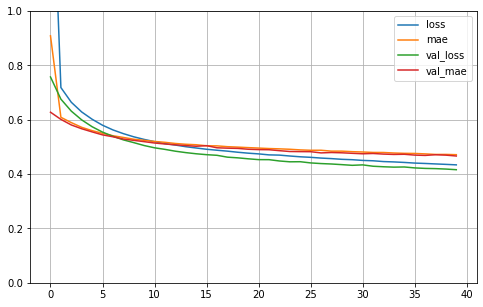

In [28]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()
plt.gca().set_ylim(0, 1)

plt.show()

# Saving and Restoring

In [30]:
#current directory working, save in h5 format
model.save("my_func_model.h5")

In [31]:
# to see the working directory
%pwd

'/Users/apple/Udemy_works/Artificial_Neural_Networks_with_Py_and_R'

In [ ]:
# to change directory where saving model
%cd /Users/apple/Udemy_works/Artificial_Neural_Networks_with_Py_and_R

In [32]:
# delete model variable
del model

In [11]:
# clear session of keras
keras.backend.clear_session()

In [43]:
# load the model
model = keras.models.load_model("my_func_model.h5")

In [44]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_4[0][0]']            

In [14]:
y_pred = model.predict(X_new)
print(y_pred)

NameError: name 'X_new' is not defined

# using Callbacks during Trianing

In [45]:
#callbacks is a checkpoint at each epoch.
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [46]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [47]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [18]:
# save each epoch as Model.epoch(two digits).h5
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [34]:
history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4859 - val_loss: 0.4575
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4800 - val_loss: 0.4509
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4750 - val_loss: 0.4468
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4707 - val_loss: 0.4432
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4672 - val_loss: 0.4391
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4634 - val_loss: 0.4354
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4600 - val_loss: 0.4316
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4574 - val_loss: 0.4311
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4549 - val_loss: 0.4279
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4521 - val_loss: 0.4248

In [20]:
del model
keras.backend.clear_session()

In [48]:
model = keras.models.load_model("Model-10.h5")

In [49]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4481


# Save Best Model Only

In [50]:
del model
keras.backend.clear_session()

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [52]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [59]:
# we don't need to save all epoch, so we can save only the best value of training
checkpoint_cb = keras.callbacks.ModelCheckpoint("best_Model.h5", save_best_only=True)

In [60]:
history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4257 - val_loss: 0.4084
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4242 - val_loss: 0.4052
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4224 - val_loss: 0.4040
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4210 - val_loss: 0.4030
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4194 - val_loss: 0.4024
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4181 - val_loss: 0.3999
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4164 - val_loss: 0.3999
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4151 - val_loss: 0.3989
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4141 - val_loss: 0.3976
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4127 - val_loss: 0.3958

In [64]:
# rollback to best mdoel
model = keras.models.load_model("best_Model.h5")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4162


# Save Best Model Only using early Stopping and Restore weight

In [68]:
del model
keras.backend.clear_session()

In [69]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [70]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [71]:
# eraly Stopping when the training accuracy is not improving then use our so far saving weight
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5", save_best_only=True)

In [74]:
# patience Number of epochs with no improvement after which training will be stopped
# and restore of best weight so far saved
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                 restore_best_weights=True)

In [75]:
history = model.fit(X_train, y_train, epochs=200,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3151 - val_loss: 0.3174
Epoch 2/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3154 - val_loss: 0.3155
Epoch 3/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3144 - val_loss: 0.3155
Epoch 4/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3147 - val_loss: 0.3150
Epoch 5/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3137 - val_loss: 0.3179
Epoch 6/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3139 - val_loss: 0.3144
Epoch 7/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3136 - val_loss: 0.3163
Epoch 8/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3132 - val_loss: 0.3149


In [76]:
model = keras.models.load_model("early_stop_model.h5")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3308


# Data importing and preprocessing

In [2]:
pwd

'/Users/apple/Udemy_works/Artificial_Neural_Networks_with_Py_and_R'

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns

In [32]:
df = pd.read_csv('House_Price.csv', header=0)

In [5]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [8]:
df.shape

(506, 19)

In [12]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


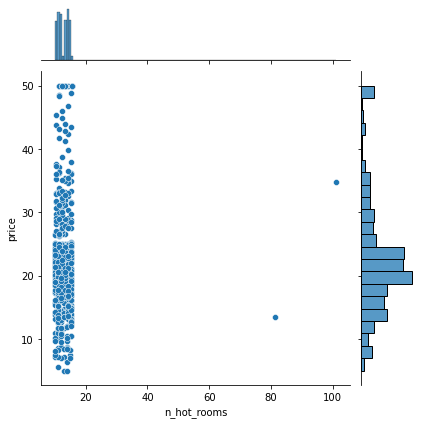

In [14]:
sns.jointplot(x='n_hot_rooms', y='price', data=df)

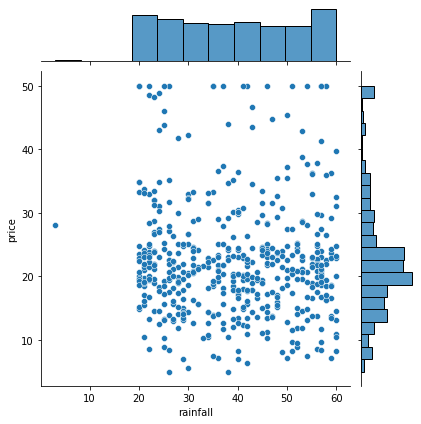

In [15]:
sns.jointplot(x='rainfall',y="price", data=df)

In [6]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


<AxesSubplot:xlabel='airport', ylabel='count'>

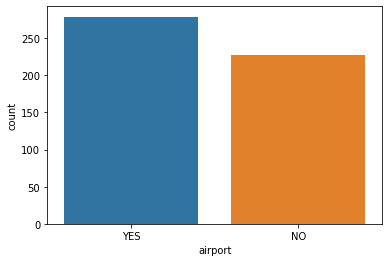

In [17]:
sns.countplot(x='airport', data=df)

<AxesSubplot:xlabel='waterbody', ylabel='count'>

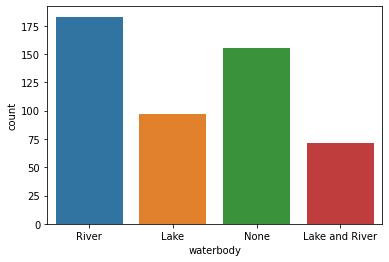

In [18]:
sns.countplot(x='waterbody', data=df)

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

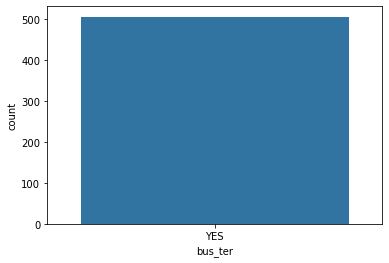

In [19]:
sns.countplot(x='bus_ter', data=df)

1. Missing values in n_hos_beds
2. skweness or outliers in crime rate
3. Outliers in n_hot_rooms and rainfall
4. Bus_ter has only 'Yes' value

Outliers

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [9]:
np.percentile(df.n_hot_rooms,[99])

array([15.39952])

In [10]:
np.percentile(df.n_hot_rooms,[99])[0]

15.39952

In [11]:
uv = np.percentile(df.n_hot_rooms,[99])[0]

In [15]:
df[(df.n_hot_rooms>uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,46.19856,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40000,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40000,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40000,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40000,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,46.19856,Lake,29,YES,0.063344


In [14]:
df.n_hot_rooms[(df.n_hot_rooms> 3*uv)] = 3*uv

/var/folders/58/j_8hz7px0l30bjvcrr05krz00000gn/T/ipykernel_5252/2840720320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[(df.n_hot_rooms> 3*uv)] = 3*uv


In [16]:
np.percentile(df.rainfall,[1])[0]

20.0

In [17]:
lv = np.percentile(df.rainfall,[1])[0]

In [24]:
df[(df.rainfall < lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,6,YES,0.044019


In [23]:
df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv

/var/folders/58/j_8hz7px0l30bjvcrr05krz00000gn/T/ipykernel_5252/4287572880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rainfall[(df.rainfall < 0.3*lv)] = 0.3*lv


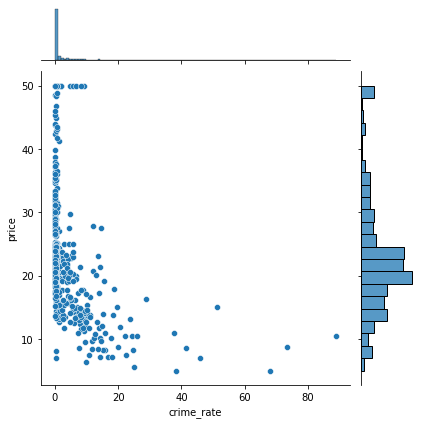

In [25]:
sns.jointplot(x="crime_rate", y="price", data=df)

In [26]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,12.864050,39.187747,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,2.688778,12.497221,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,6.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,46.198560,60.000000,0.086711


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [29]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [34]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

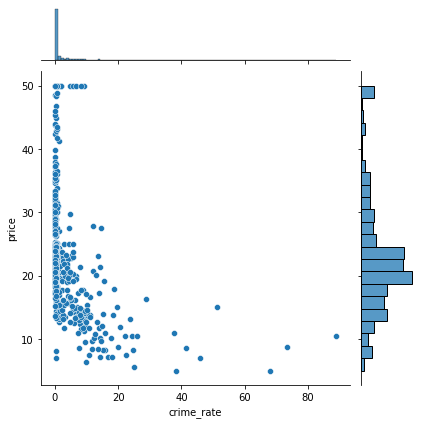

In [36]:
sns.jointplot(x="crime_rate", y="price", data=df)

In [37]:
df.crime_rate = np.log(1+df.crime_rate)

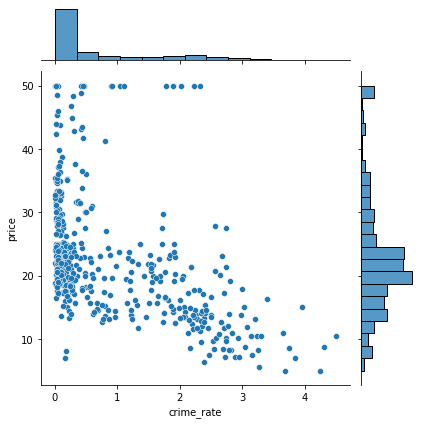

In [38]:
sns.jointplot(x="crime_rate", y="price", data=df)

In [39]:
df['avg_dist'] = (df.dist1+df.dist2+df.dist3+df.dist4)/4

In [42]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,5.238957,12.513697,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,12.127500


In [43]:
del df['dist1']

In [44]:
del df['dist2']

In [45]:
del df['dist3']

In [46]:
del df['dist4']

In [47]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.464939,5.238957,12.513697,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,12.127500


In [48]:
del df['bus_ter']

In [50]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,avg_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.1920,River,23,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.1728,Lake,42,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,101.1200,None,38,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.2672,Lake,45,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.2896,Lake,55,0.039474,6.0625


In [51]:
df = pd.get_dummies(df)

In [53]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,6.0625,1,0,1,0,0,0


# Dummies Variables

In [54]:
del df['airport_NO']

In [55]:
del df['waterbody_None']

In [56]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,0.045764,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,6.0625,0,1,0,0


# Test-Train Score error and variance

In [76]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [79]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=24)

In [77]:
lm3 = LinearRegression()

In [81]:
lm3.fit(X_train_full, y_train_full)

LinearRegression()

In [83]:
#print(lm3.intercept, lm3.coef_)

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_train_full,
                                                    y_train_full, test_size = 0.2, random_state=0)

In [86]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12384, 8) (3096, 8) (12384,) (3096,)


In [87]:
lm_a = LinearRegression()

In [88]:
lm_a.fit(X_train, y_train)

LinearRegression()

In [89]:
y_test_a = lm_a.predict(X_test)

In [90]:
y_train_a = lm_a.predict(X_train)

In [91]:
from sklearn.metrics import r2_score

In [92]:
r2_score?

In [93]:
r2_score(y_test, y_test_a)

0.597475749091264

In [94]:
r2_score(y_train, y_train_a)

0.6062824736575858